## K-means clustering 단점
- 초기 중심값에 민감한 반응을 보임
- 노이즈와 이상치에 민감함
- 군집의 개수 K를 설정하는 것의 어려움

## DBSCAN
- Density-based Spatial Clustering of Applications with Noise
- 2014년 KDD학회에서 상을 받은 알고리즘으로, density-based clustering 중 가장 유명하고 성능이 우수하다고 알려져 있음
- DBSCAN의 특징은 **eps-neighbors**와 **MinPts**를 사용하여 군집을 구성(2개의 하이퍼 파라미터를 가진다는 뜻임)
  - **eps-neighbors** : 한 데이터를 중심으로 epsilon($\epsilon$)거리 이내의 데이터들을 한 군집으로 구성
  - **MinPts** : 한 군집은 MinPts보다 많거나 같은 수의 데이터로 구성됨
    - 만약, MinPts보다 적은 수의 데이터가 eps-neighbors를 형성하면 노이즈로 취급함
    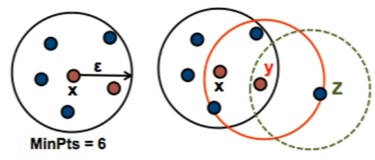

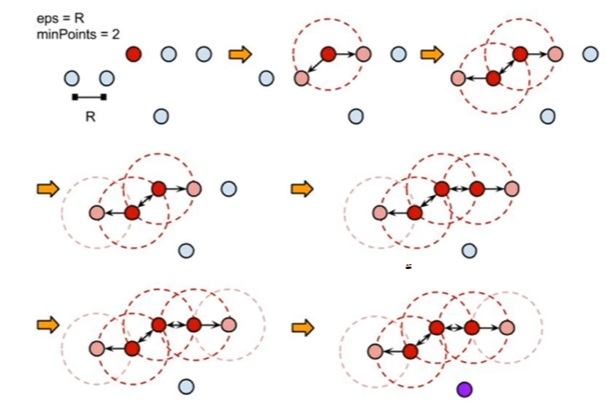

- 군집의 수를 설정할 필요 없이 **밀도 기반으로 자동적으로 군집을 형성**
- 형성 이후 군집이 형성되지 않은 값은 이상치로 취급

## DBSCAN 예시
- 최소 거리 $\epsilon$이내의 데이터들이 점진적으로 한 군집으로 합쳐지며 다양한 모양의 군집을 형성
- 군집이 안 된 데이터는 노이즈 취급 : outlier detection 분야에서도 사용이 가능하다
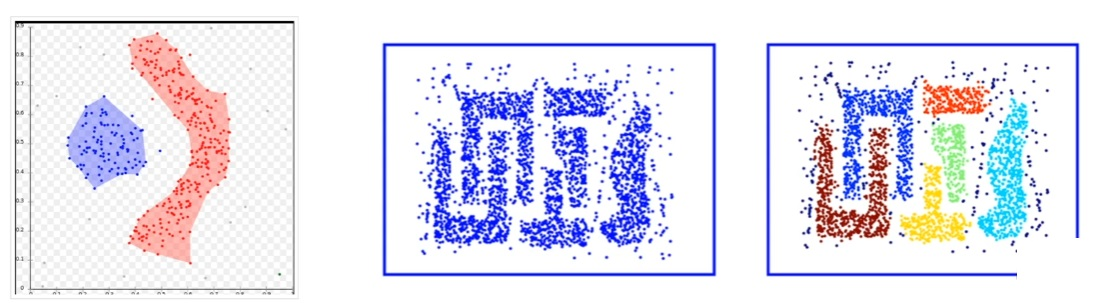

## DBSCAN의 파라미터
### MinPts, eps의 설정
- DBSCAN은 군집 분석을 적용하고자 하는 데이터에 대한 이해도가 충분할 때 파라미터 설정이 쉬움
- MinPts의 설정
  - 간단히 설정하는 경우에는 다음과 같음 : MinPts=변수의 수+1
  - MinPts는 3 이상으로 설정
    - 1인 경우 데이터 하나하나가 개별 군집을 형성함


### eps의 설정
- 너무 작은 경우, 상당 수의 데이터가 노이즈로 구분될 수 있음
- 너무 큰 경우, 군집의 수가 하나가 될 가능성이 있음
- 일반적으로 K-nearest neighbors graph의 distances를 그래프로 나타낸 후, **거리가 급격하게 증가하는 지점을 eps으로 설정**함

## 장점
- K-means와 다르게 군집의 수를 설정할 필요가 없음
- 다양한 모양의 군집이 형성될 수 있으며, 군집끼리 겹치는 경우가 없음
- 노이즈 개념 덕분에 이상치 대응이 가능
- 설정할 파라미터가 두 개로 적은 편이며, 적용 분야에 대한 사전 지식이 있는 경우 비교적 쉽게 설정이 가능함

## 단점
- 한 데이터는 하나의 군집에 속하게 되므로, 시작점에 따라 모양의 군집이 형성됨
- eps의 크기에 의해 DBSCAN의 성능이 크게 좌우됨
- 군집별로 밀도가 다른 경우 DBSACN을 이용하면 군집화가 제대로 이루어지지 않음

## 정리
- 군집 분석을 한 이후 이를 이용하여 다시 ML을 돌린다고 해도 성능이 좋아지지는 않음
- 사회공학적으로 분석을 하고 싶은 경우 유용하게 사용할 수 있음

## DBSCAN 실습

In [1]:
from sklearn import datasets
import pandas as pd

iris=datasets.load_iris()
labels=pd.DataFrame(iris.target)
labels.columns=['labels']
data=pd.DataFrame(iris.data)
data.columns=['Sepal length', 'Sepal width','Petal length','Petal width']
data=pd.concat([data,labels],axis=1)
data.head()

,Sepal length,Sepal width,Petal length,Petal width,labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [2]:
feature=data[['Sepal length', 'Sepal width','Petal length','Petal width']]
feature.head()

,Sepal length,Sepal width,Petal length,Petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot  as plt
import seaborn as sns

# create model and prediction
model = DBSCAN(eps=0.5,min_samples=5)
predict = pd.DataFrame(model.fit_predict(feature))
predict.columns=['predict']

# concatenate labels to df as a new column
r = pd.concat([feature,predict],axis=1)

print(r)

     Sepal length  Sepal width  Petal length  Petal width  predict
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        1
146           6.3          2.5           5.0          1.9        1
147           6.5          3.0           5.2          2.0        1
148           6.2          3.4           5.4          2.3        1
149           5.9          3.0           5.1          1.8        1

[150 rows x 5 columns]


## DBSCAN 결과 시각화

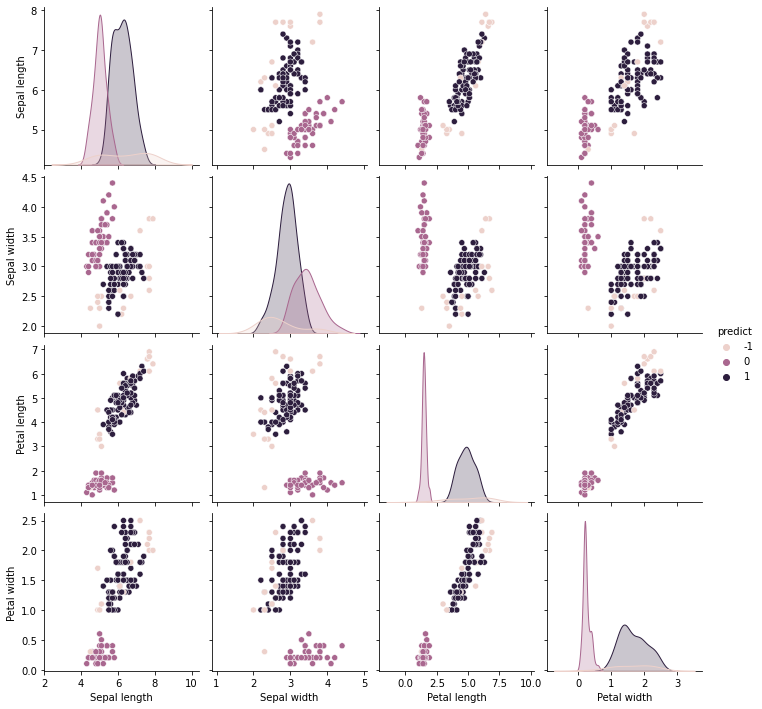

In [4]:
#pairplot with Seaborn
sns.pairplot(r,hue='predict')
plt.show()

## 실제 데이터 시각화

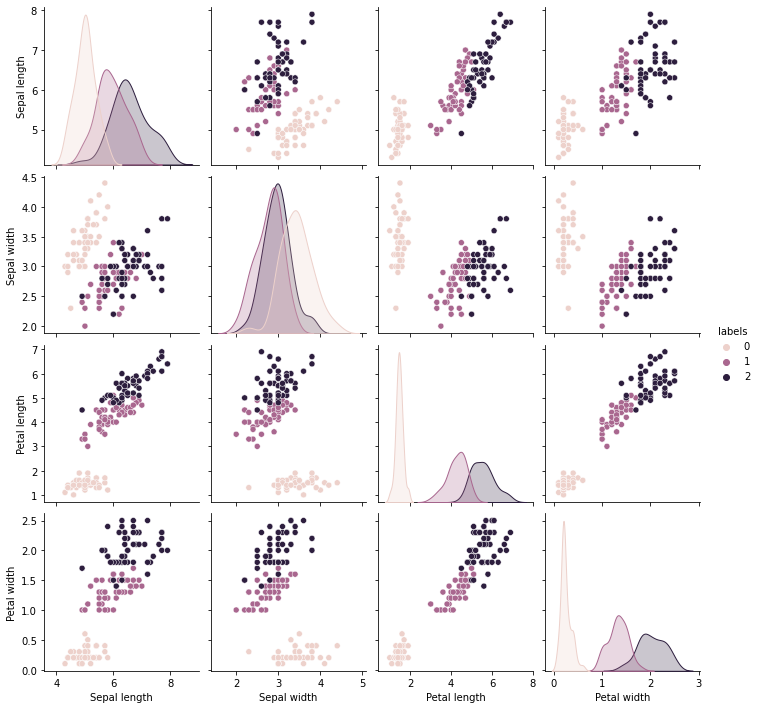

In [5]:
#pairplot with Seaborn
sns.pairplot(data,hue='labels')
plt.show()

- 생각보다 결과가 잘 안 나오는 것을 확인할 수 있다.(predict에서 -1은 이상치로 분류함)

## K-means 결과와 비교

In [6]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3, n_jobs = 4, random_state=21)
km.fit(feature)

C:\Users\mitha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=4, random_state=21)

In [7]:
new_labels =pd.DataFrame(km.labels_)
new_labels.columns=['predict']

In [8]:
r2 = pd.concat([feature,new_labels],axis=1)

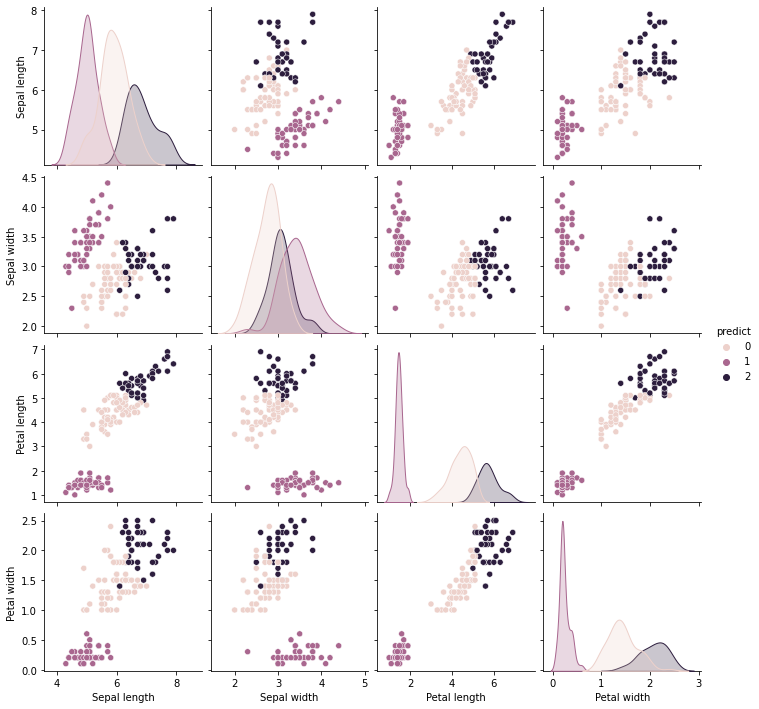

In [9]:
#pairplot with Seaborn
sns.pairplot(r2,hue='predict')
plt.show()

- 균일하게 데이터를 가져가는 경향이 있음
- DBSCAN은 근처에 있다면 군집화되는 경향이 있기 때문에 위와 같은 형식으로 군집이 형성될 수밖에 없음

## 밀도를 가지는 데이터에 대해 클러스터링

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import time
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

In [11]:
data = np.load('C:/Users/mitha/OneDrive/바탕 화면/clusterable_data.npy')

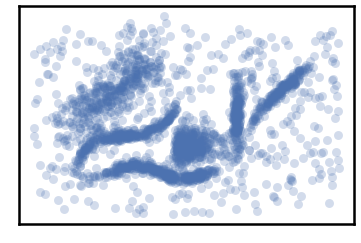

In [12]:
plt.scatter(data.T[0], data.T[1], c='b', **plot_kwds)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)

In [15]:
def plot_clusters(data, algorithm, args, kwds):
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    end_time = time.time()
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=18)
    plt.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)

## K-means 사용 결과

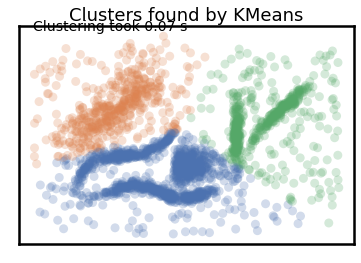

In [16]:
plot_clusters(data, cluster.KMeans, (), {'n_clusters':3})

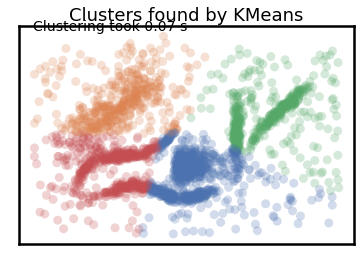

In [17]:
plot_clusters(data, cluster.KMeans, (), {'n_clusters':4})

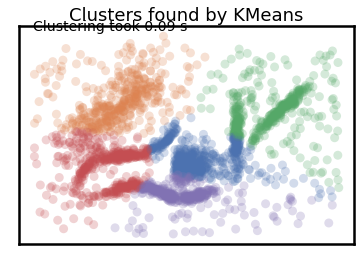

In [18]:
plot_clusters(data, cluster.KMeans, (), {'n_clusters':5})

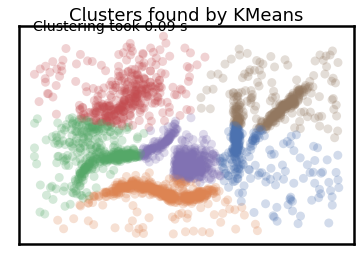

In [19]:
plot_clusters(data, cluster.KMeans, (), {'n_clusters':6})

## DBSCAN 사용 결과

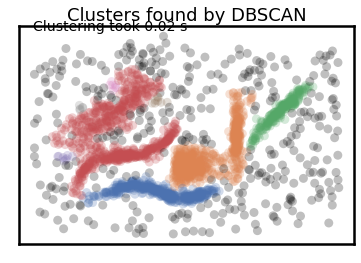

In [20]:
plot_clusters(data, cluster.DBSCAN, (), {'eps':0.025})

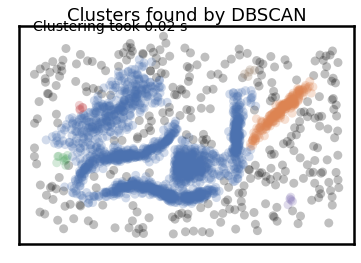

In [21]:
plot_clusters(data, cluster.DBSCAN, (), {'eps':0.03})

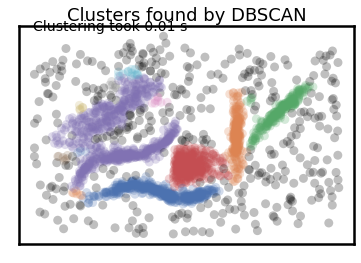

In [25]:
plot_clusters(data, cluster.DBSCAN, (), {'eps':0.024})

## HDBSACN
- DBSCAN의 발전 버전. 하이퍼 파라미터에 덜민감함

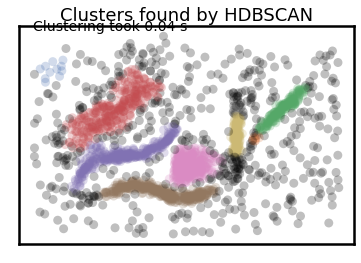

In [27]:
#pip install hdbscan
import hdbscan
plot_clusters(data, hdbscan.HDBSCAN, (), {'min_cluster_size':10})

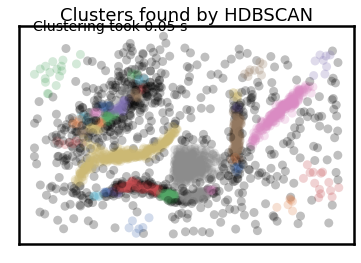

In [28]:
plot_clusters(data, hdbscan.HDBSCAN, (), {'min_cluster_size':5})

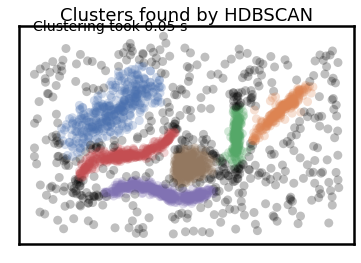

In [33]:
plot_clusters(data, hdbscan.HDBSCAN, (), {'min_cluster_size':25})